In [103]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plot
import seaborn as sns
from statsmodels.distributions.mixture_rvs import mixture_rvs

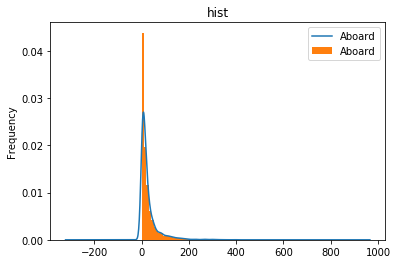

In [41]:
import pandas as panda
pdf=panda.read_csv("c:/work/statis/air-crash/aircrashes.csv")
sample_aboard=list(pdf['Aboard'].dropna().astype(int))
sample_fata=list(pdf['Fatalities'].dropna().astype(int))
series=panda.DataFrame({'Aboard':sample})
# series['Aboard'].describe()
fig,ax=plot.subplots()
series.plot.kde(ax=ax,legend="False", title="hist")
series.plot.hist(density="True", ax=ax, bins=64)

In [97]:
sample_aboard=list(pdf['Aboard'].dropna().astype(int))
print(len(sample_aboard))
print(len(sample_fata))
# print(pdf.iloc[2400])
# print(pdf.loc[1:10,['Aboard','Fatalities']])
sample_aboard=list(pdf[pdf.Aboard<150]['Aboard'].dropna().astype(int))
sample_fata=list(pdf[pdf.Fatalities<150]['Fatalities'].dropna().astype(int))
print(len(sample_aboard))
print(len(sample_fata))
# pdf.describe()
# Scatter plot of data samples and histogram


5246
64
5117
5192


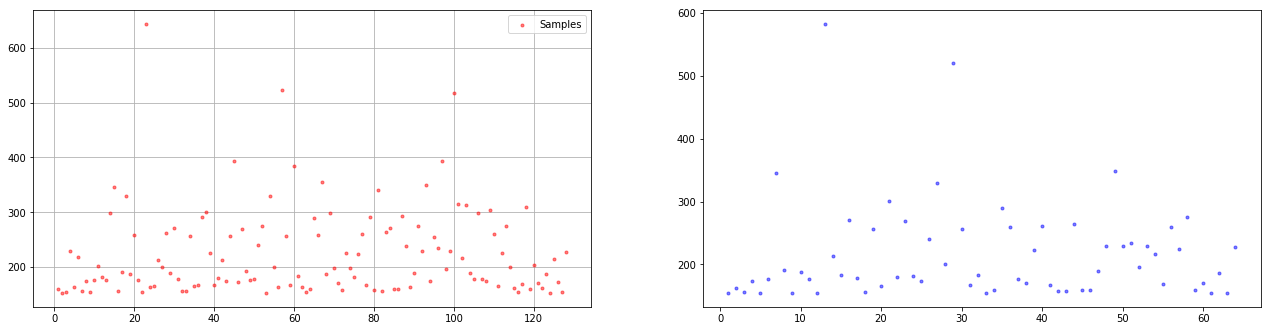

In [96]:
fig = plot.figure(figsize=(22, 12))
ax = fig.add_subplot(221)
x = np.linspace(start=1,stop=len(sample_aboard), num=len(sample_aboard))
x1 = np.linspace(start=1,stop=len(sample_fata), num=len(sample_fata))
ax.scatter(x, sample_aboard, zorder=15, color='red', marker='.', alpha=0.5, label='Samples')
ax1= fig.add_subplot(222)
ax1.scatter(x1, sample_fata, zorder=15, color='blue', marker='.', alpha=0.5, label='Samples')
# lines = ax.hist(sample, bins=1000, edgecolor='k', label='Histogram')

ax.legend(loc='best')
ax.grid(True, zorder=-5)

149
-0.9933333333333333
0.76253059613107


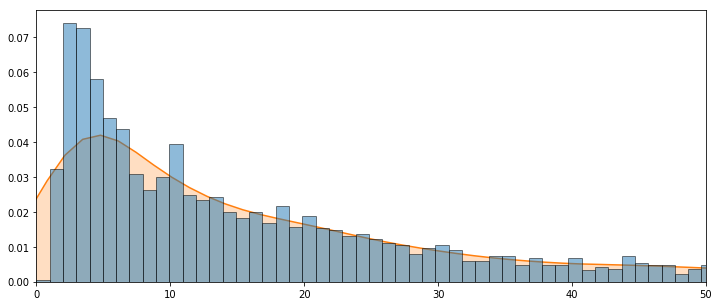

In [164]:
kde = sm.nonparametric.KDEUnivariate(sample_aboard)
# kde.fit() # Estimate the densities
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
print(max(sample_aboard))
# Plot the histrogram
density, bins, patches=ax.hist(sample_aboard, bins=150, density=True, label='Histogram from samples', zorder=5, edgecolor='k', alpha=0.5)
ax.set_xlim(0,50)
kde=sns.kdeplot(sample_aboard, shade=True);
# print(density)
print(bins[1]-bins[2])
print((0.9933*density[:-120]).sum())

# print (array_dist)
# for x in range(1,20):    
#     print((widths*density))

# print((widths*density[x]).sum())
    
# Plot the KDE as fitted using the default arguments
# ax.plot(kde.support, kde.density, lw=3, label='KDE from samples', zorder=10)

TypeError: list indices must be integers or slices, not tuple

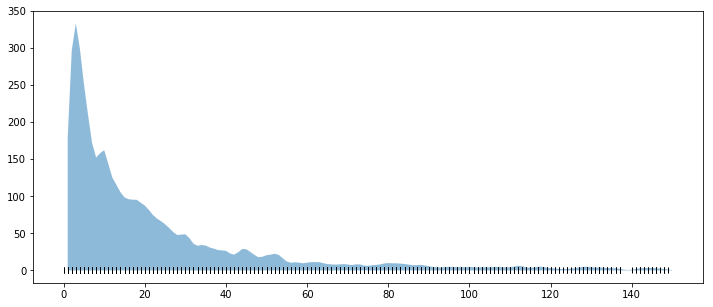

In [264]:
from sklearn.neighbors import KernelDensity
x_d = np.linspace(1, 150, 150)
x=sample_aboard
fig = plot.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
density1 = sum(norm(xi).pdf(x_d) for xi in x)
# print(density1)
ax.fill_between(x_d, density1, alpha=0.5)
ax.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)



# plt.axis([-4, 8, -0.2, 5]);
# # instantiate and fit the KDE model
# kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
# kde.fit(density[:, None])

# # score_samples returns the log of the probability density
# logprob = kde.score_samples(density[:, None])

# plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
# plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
# plt.ylim(-0.02, 0.22)

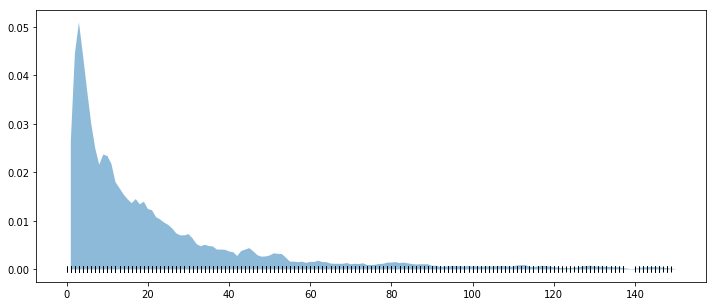

In [273]:
arr_x = np.array(x)
kde = KernelDensity(bandwidth=2.0, kernel='tophat')
kde.fit(arr_x[:, None])
logprob = kde.score_samples(x_d[:, None])
fig = plot.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.fill_between(x_d, np.exp(logprob), alpha=0.5)
ax.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
# ax.ylim(-0.02, 0.22)


In [279]:
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),{'bandwidth': bandwidths},cv=LeaveOneOut(len(x)))
grid.fit(x[:, None]);

TypeError: __init__() takes 1 positional argument but 2 were given

0.20.2
